In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("superstore.csv")
df.shape

(51290, 27)

In [3]:
total_sales = df["Sales"].sum()
total_sales 

np.int64(12642905)

In [4]:
total_profit = df["Profit"].sum()
total_profit

np.float64(1467457.2912800002)

In [5]:
total_quantity_sold = df["Quantity"].sum()
total_quantity_sold

np.int64(178312)

In [6]:
unique_orders = df["Order.ID"].nunique()
avg_order_value = total_sales / unique_orders
avg_order_value

np.float64(505.0091871380068)

In [7]:
profit_margin = (total_profit / total_sales) * 100
profit_margin

np.float64(11.606962887722403)

In [8]:
country_data = df.groupby("Country")["Sales"].sum().sort_values(ascending= False)
top_country = country_data.idxmax()
top_country_sale = country_data.max()
print(f"{top_country} : {top_country_sale}")

United States : 2297354


In [9]:
market = df.groupby("Market")["Profit"].sum().sort_values(ascending = True)
market

Market
Canada     17817.39000
EMEA       43897.97100
Africa     88871.63100
LATAM     221643.48708
US        286397.02170
EU        372829.74150
APAC      436000.04900
Name: Profit, dtype: float64

In [10]:
top_market = market.idxmax()
top_market_profit = market.max()
print(f"{top_market}:{top_market_profit}")

APAC:436000.049


In [11]:
loss_country = df.groupby("Country")["Profit"].sum().sort_values()
loss_country


Country
Turkey            -98447.2320
Nigeria           -80750.7180
Netherlands       -41070.0750
Honduras          -29482.3714
Pakistan          -22446.6480
                     ...     
France            109029.0030
United Kingdom    111900.1500
India             129071.8350
China             150683.0850
United States     286397.0217
Name: Profit, Length: 147, dtype: float64

In [12]:
most_loss_country = loss_country.idxmin()

In [13]:
print(f"Country having most loss is {most_loss_country}")

Country having most loss is Turkey


In [14]:
country_performance = (
    df.groupby("Country")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
)
country_performance.head(10)

,Sales,Profit
Country,,
United States,2297354,286397.02170
Australia,925257,103907.43300
France,858930,109029.00300
China,700591,150683.08500
Germany,628857,107322.82050
Mexico,622620,102818.09752
India,589664,129071.83500
United Kingdom,528570,111900.15000
Indonesia,404887,15608.67790


In [15]:
country_performance["Profit_margin"] = country_performance["Profit"] / country_performance["Sales"]
country_performance

,Sales,Profit,Profit_margin
Country,,,
United States,2297354,286397.0217,0.124664
Australia,925257,103907.4330,0.112301
France,858930,109029.0030,0.126936
China,700591,150683.0850,0.215080
Germany,628857,107322.8205,0.170663
...,...,...,...
Tajikistan,242,-262.8660,-1.086223
Macedonia,210,43.3800,0.206571
Eritrea,188,76.2000,0.405319


In [16]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending = False)
category_sales

Category
Technology         4744691
Furniture          4110884
Office Supplies    3787330
Name: Sales, dtype: int64

In [17]:
top_category = category_sales.idxmax()
top_category

'Technology'

In [18]:
top_category_sales = category_sales.max()
top_category_sales
print(f"{top_category} : {top_category_sales}")

Technology : 4744691


In [19]:
sub_category = df.groupby("Sub.Category")["Profit"].sum().sort_values(ascending = False)
sub_category

Sub.Category
Copiers        258567.54818
Phones         216717.00580
Bookcases      161924.41950
Appliances     141680.58940
Chairs         140396.26750
Accessories    129626.30620
Storage        108461.48980
Binders         72449.84600
Paper           59207.68270
Machines        58867.87300
Art             57953.91090
Furnishings     46967.42550
Envelopes       29601.11630
Supplies        22583.26310
Labels          15010.51200
Fasteners       11525.42410
Tables         -64083.38870
Name: Profit, dtype: float64

In [20]:
most_profitable = sub_category.idxmax()
most_profitable

'Copiers'

In [21]:
max_profit = sub_category.max()
max_profit
print(f"category with max profit = {most_profitable} : {max_profit}")

category with max profit = Copiers : 258567.54818


In [22]:
product_sell = df.groupby("Product.Name")["Sales"].sum().sort_values(ascending = False)
product_sell.head(10)

Product.Name
Apple Smart Phone, Full Size                                86936
Cisco Smart Phone, Full Size                                76441
Motorola Smart Phone, Full Size                             73159
Nokia Smart Phone, Full Size                                71904
Canon imageCLASS 2200 Advanced Copier                       61600
Hon Executive Leather Armchair, Adjustable                  58200
Office Star Executive Leather Armchair, Adjustable          50667
Harbour Creations Executive Leather Armchair, Adjustable    50120
Samsung Smart Phone, Cordless                               48654
Nokia Smart Phone, with Caller ID                           47880
Name: Sales, dtype: int64

In [23]:
profit_products = df.groupby("Product.Name")["Profit"].sum().sort_values(ascending = False)
profit_products.head(10)

Product.Name
Canon imageCLASS 2200 Advanced Copier                       25199.9280
Cisco Smart Phone, Full Size                                17238.5206
Motorola Smart Phone, Full Size                             17027.1130
Hoover Stove, Red                                           11807.9690
Sauder Classic Bookcase, Traditional                        10672.0730
Harbour Creations Executive Leather Armchair, Adjustable    10427.3260
Nokia Smart Phone, Full Size                                 9938.1955
Cisco Smart Phone, with Caller ID                            9786.6408
Nokia Smart Phone, with Caller ID                            9465.3257
Belkin Router, USB                                           8955.0180
Name: Profit, dtype: float64

In [24]:
profit_products.tail(10)

Product.Name
Lesro Training Table, Rectangular                          -2581.2834
Bevis Wood Table, with Bottom Storage                      -2782.5880
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases   -2876.1156
Rogers Lockers, Blue                                       -2893.4908
Bevis Computer Table, Fully Assembled                      -3509.5638
Bevis Round Table, Adjustable Height                       -3649.8940
Cubify CubeX 3D Printer Triple Head Print                  -3839.9904
Motorola Smart Phone, Cordless                             -4447.0380
Lexmark MX611dhe Monochrome Laser Printer                  -4589.9730
Cubify CubeX 3D Printer Double Head Print                  -8879.9704
Name: Profit, dtype: float64

In [25]:
df["order_date"] = pd.to_datetime(df["Order.Date"])
df["yearly"] = df["order_date"].dt.year
yearly_trend = df.groupby("yearly")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False)
yearly_trend

,Sales,Profit
yearly,,
2014,4300041,504165.97046
2013,3405860,406935.23018
2012,2677493,307415.27910
2011,2259511,248940.81154


In [26]:
df["monthly"] = df["order_date"].dt.month_name()
monthly_sales = df.groupby("monthly")["Sales"].sum().sort_values(ascending = False)
monthly_sales

monthly
December     1580816
November     1551319
September    1437432
August       1293852
June         1269751
October      1168220
May           904061
March         770519
July          749423
April         698603
January       675141
February      543768
Name: Sales, dtype: int64

In [27]:
max_growth_year = yearly_trend.idxmax()
max_growth_year

Sales     2014
Profit    2014
dtype: int32

In [28]:
seasonal_sales = df.groupby("monthly")["Sales"].mean().reindex([
"January", "February", "March", "April","May", "June", "July",
"August", "September", "October", "November", "December"
])
seasonal_sales

monthly
January      259.769527
February     250.815498
March        253.877759
April        228.525679
May          241.275954
June         238.182517
July         236.709728
August       254.795589
September    240.574393
October      260.182628
November     244.610375
December     250.843542
Name: Sales, dtype: float64

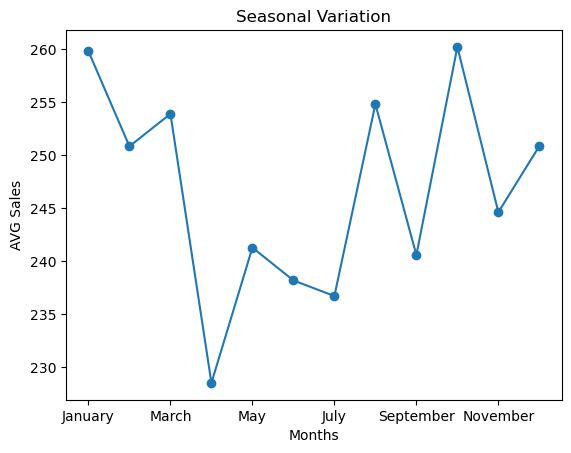

In [31]:
import matplotlib.pyplot as plt

plt.figure()
seasonal_sales.plot(kind = "line", marker = "o")
plt.xlabel("Months")
plt.ylabel("AVG Sales")
plt.title("Seasonal Variation")
plt.savefig("images/seasonal_sales.png")
plt.show()

In [32]:
discount_profit = df.groupby("Discount")["Profit"].mean()
discount_profit.head(10)

Discount
0.000     61.039514
0.002    125.762649
0.070    140.990022
0.100     63.683426
0.150     50.602409
0.170     38.317107
0.200     23.552594
0.202    -14.518847
0.250      4.043371
0.270     -4.317213
Name: Profit, dtype: float64

In [33]:
discount_bin = pd.cut(
    df["Discount"],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1],
    include_lowest=True
)
df2 = df.copy()
discount_impact = (
    df2.groupby(discount_bin, observed=True)[["Sales", "Profit"]]
    .mean().sort_values(by = "Profit")
)
discount_impact

,Sales,Profit
Discount,,
"(0.5, 1.0]",89.075743,-98.893015
"(0.4, 0.5]",170.208318,-77.027382
"(0.3, 0.4]",206.284412,-48.857485
"(0.2, 0.3]",395.594623,-21.877573
"(0.1, 0.2]",280.091807,27.614734
"(-0.001, 0.1]",265.832552,62.600467


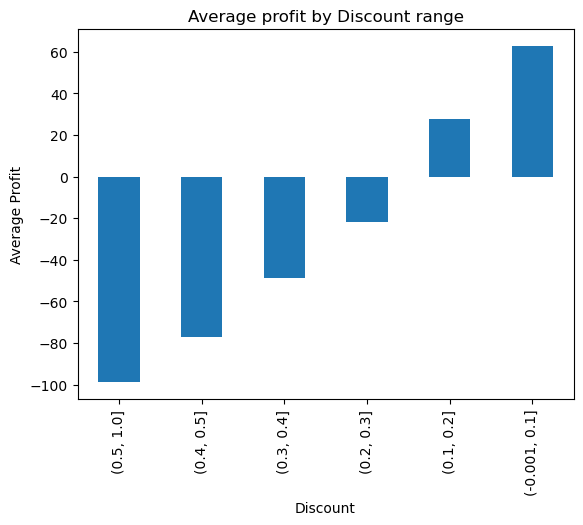

In [34]:
plt.figure()
discount_impact["Profit"].plot(kind = "bar")
plt.xlabel("Discount")
plt.ylabel("Average Profit")
plt.title("Average profit by Discount range")
plt.savefig("images/discount_impact")
plt.show()

In [35]:
avg_sales_by_discount = (
    df2.groupby(discount_bin, observed = True)["Sales"].mean()
)
avg_sales_by_discount

Discount
(-0.001, 0.1]    265.832552
(0.1, 0.2]       280.091807
(0.2, 0.3]       395.594623
(0.3, 0.4]       206.284412
(0.4, 0.5]       170.208318
(0.5, 1.0]        89.075743
Name: Sales, dtype: float64

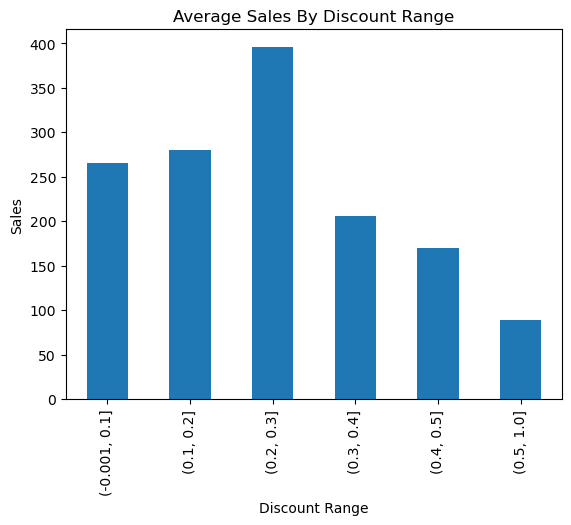

In [36]:
plt.figure()
avg_sales_by_discount.plot(kind = "bar")
plt.xlabel("Discount Range")
plt.ylabel("Sales")
plt.title("Average Sales By Discount Range")
plt.savefig("images/average_sales_by_discount.png")
plt.show()

In [37]:
discount_max_profit = discount_impact.max()
discount_max_profit_range = discount_impact.idxmax()
discount_max_profit
discount_max_profit_range

Sales        (0.2, 0.3]
Profit    (-0.001, 0.1]
dtype: category
Categories (6, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] < (0.4, 0.5] < (0.5, 1.0]]

In [38]:
profit_by_discount = (
    df2.groupby(discount_bin, observed = True)["Profit"].mean()
)
profit_by_discount

Discount
(-0.001, 0.1]    62.600467
(0.1, 0.2]       27.614734
(0.2, 0.3]      -21.877573
(0.3, 0.4]      -48.857485
(0.4, 0.5]      -77.027382
(0.5, 1.0]      -98.893015
Name: Profit, dtype: float64

In [39]:
df2["Loss"] = df2["Profit"] < 0
loss_rate = (
    df2.groupby(discount_bin, observed = True)["Loss"].mean() * 100
)
loss_rate

Discount
(-0.001, 0.1]      2.674543
(0.1, 0.2]        23.318457
(0.2, 0.3]        62.150982
(0.3, 0.4]        80.205882
(0.4, 0.5]        96.091789
(0.5, 1.0]       100.000000
Name: Loss, dtype: float64

In [40]:
ship_mode_count = df["Ship.Mode"].value_counts()
ship_mode_count

Ship.Mode
Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: count, dtype: int64

In [41]:
most_frequent_ship_mode = ship_mode_count.max()
most_frequent_ship_mode_name = ship_mode_count.idxmax()
print(f"{most_frequent_ship_mode_name} : {most_frequent_ship_mode}")

Standard Class : 30775


In [42]:
ship_mode_profit = df.groupby("Ship.Mode")["Profit"].sum().sort_values(ascending = False)
ship_mode_profit

Ship.Mode
Standard Class    890596.02120
Second Class      292583.52708
First Class       208104.67520
Same Day           76173.06780
Name: Profit, dtype: float64

In [43]:
max_profit_ship_mode = ship_mode_profit.max()
max_profit_ship_mode_name = ship_mode_profit.idxmax()
print(f"{max_profit_ship_mode_name} : {max_profit_ship_mode}")


Standard Class : 890596.0212


In [44]:
ship_mode_profit_on_cost = df.groupby("Ship.Mode")[["Profit", "Shipping.Cost"]].mean().sort_values(by = "Profit",ascending = False)
ship_mode_profit_on_cost

,Profit,Shipping.Cost
Ship.Mode,,
Standard Class,28.938945,19.971654
Second Class,28.381368,30.469666
Same Day,28.201802,42.937325
First Class,27.728804,41.052970


<Figure size 640x480 with 0 Axes>

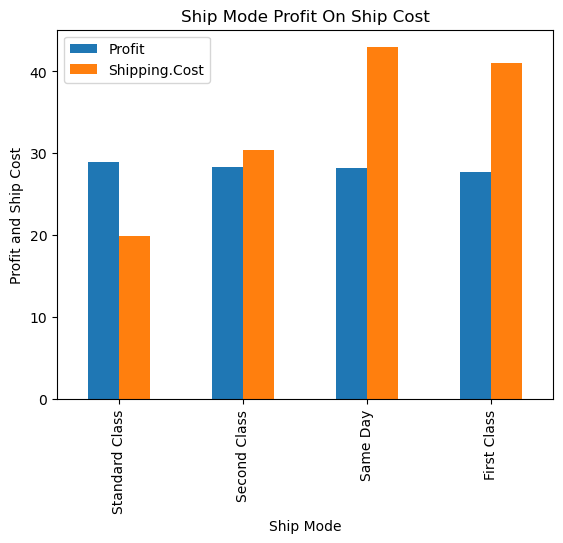

In [45]:
plt.figure()
ship_mode_profit_on_cost.plot(kind = "bar")
plt.xlabel("Ship Mode")
plt.ylabel("Profit and Ship Cost")
plt.title("Ship Mode Profit On Ship Cost")
plt.savefig("images/ship_mode_profit")
plt.show()

In [46]:
ship_mode_profit_on_cost = df.groupby("Ship.Mode")[["Profit", "Sales"]].mean().sort_values(by = "Profit",ascending = False)
ship_mode_profit_on_cost

,Profit,Sales
Ship.Mode,,
Standard Class,28.938945,246.267717
Second Class,28.381368,248.884179
Same Day,28.201802,247.020363
First Class,27.728804,243.979614


In [47]:
ship_mode_profit_on_cost["Profit_Margin"] = (
    (ship_mode_profit_on_cost["Profit"] / ship_mode_profit_on_cost["Sales"] ) * 100
)
ship_mode_profit_on_cost

,Profit,Sales,Profit_Margin
Ship.Mode,,,
Standard Class,28.938945,246.267717,11.751010
Second Class,28.381368,248.884179,11.403444
Same Day,28.201802,247.020363,11.416792
First Class,27.728804,243.979614,11.365214


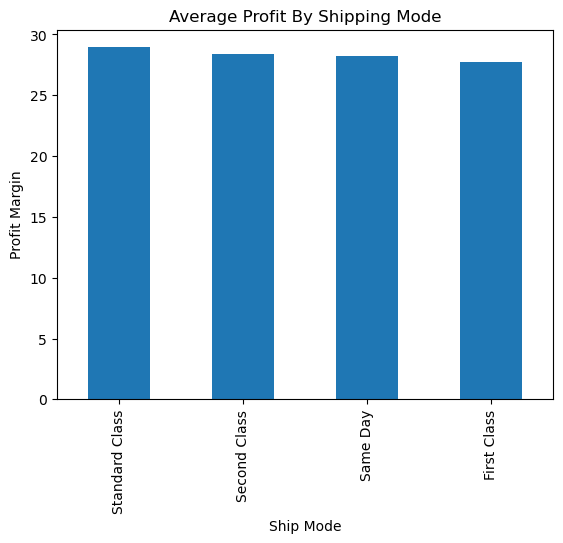

In [48]:
plt.figure()
ship_mode_profit_on_cost["Profit"].plot(kind = "bar")
plt.xlabel("Ship Mode")
plt.ylabel("Profit Margin")
plt.title("Average Profit By Shipping Mode")
plt.savefig("Average_Profit_By_Shipping_Mode.png")
plt.show()

In [49]:
contribution = df.groupby("Segment")["Sales"].sum().sort_values( ascending = False)
contribution 

Segment
Consumer       6508141
Corporate      3824808
Home Office    2309956
Name: Sales, dtype: int64

In [50]:
top_segment_name = contribution.idxmax()
top_segment_name

'Consumer'

In [51]:
top_segment = contribution.max()
print(f"{top_segment_name} : {top_segment}")

Consumer : 6508141


In [52]:
segment_profit = df.groupby("Segment")["Profit"].sum().sort_values( ascending = False)
segment_profit

Segment
Consumer       749239.78206
Corporate      441208.32866
Home Office    277009.18056
Name: Profit, dtype: float64

In [53]:
max_segment_profit_name = segment_profit.idxmax()
max_segment_profit_name

'Consumer'

In [54]:
max_segment_profit = segment_profit.max()
print(f"{max_segment_profit_name} : {max_segment_profit}")

Consumer : 749239.78206


In [55]:
customers_by_sales = df.groupby("Customer.Name")["Sales"].sum().sort_values(ascending = False)
customers_by_sales.head(10)

Customer.Name
Tom Ashbrook          40489
Tamara Chand          37453
Greg Tran             35552
Christopher Conant    35187
Sean Miller           35170
Bart Watters          32315
Natalie Fritzler      31778
Fred Hopkins          30404
Jane Waco             30288
Hunter Lopez          30246
Name: Sales, dtype: int64